## Problem 1 :  Moonbucks is always looking at the possibilities of expanding their business by adding the number of stores around the world. To do this, they need to analyse local economic and social situations to ensure maximum profits. 

In [341]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Parse the text file to the program

In [342]:
# READ ARTICLE TEXT FILE
"""----------------------"""
japanFile = open('Japan.txt', 'r', encoding='utf-8')
japan = japanFile.read()

koreaFile = open("Korea.txt", "r", encoding='utf-8')
korea = koreaFile.read()

malaysiaFile = open("Malaysia.txt", "r", encoding='utf-8')
malaysia = malaysiaFile.read()

uaeFile = open("UAE.txt", "r", encoding='utf-8')
uae = uaeFile.read()

usaFile = open("USA.txt", "r", encoding='utf-8')
usa = usaFile.read()

japanFile.close()
koreaFile.close()
malaysiaFile.close()
uaeFile.close()
usaFile.close()

# separate articles by 5 lines
list_of_countries = [japan, korea, malaysia, uae, usa]
number_of_countries = len(list_of_countries)
number_of_articles = 5
articles = [txt for txt in list_of_countries]

i = 0
for country in list_of_countries:
    x = country.split("$pl1tT3XT%")
    articles[i] = x
    i += 1
# articles[0][1] >>> atricle for list_of_countries[0], article number 2


# INITIALIZE WORDS
"""----------------------"""
# get the positive words and negative words and the neutral words
positiveFile = open("Positive_words.txt", "r", encoding='utf-8')
positive = positiveFile.read().lower().split(", ")
negativeFile = open("Negative_words.txt", "r", encoding='utf-8')
negative = negativeFile.read().lower().split(", ")


# get the stop words
stop_word_file = open("stop word.txt", "r", encoding='utf-8')
stop_word = stop_word_file.read().split()
stop_word_file.close()
# stop_word

# get punctuation,numbers,special characters
specialCharFile = open("special characters.txt", "r", encoding='utf-8')
specialChar = specialCharFile.read().split()
specialCharFile.close()

### Clean the article

In [343]:
# CLEAN THE ARTICLE
"""----------------------"""
# remove specialChar
for countries in range(number_of_countries):
    for article in range(number_of_articles):
        replacedStr = articles[countries][article]
        for i in specialChar:
            replacedStr = replacedStr.replace(i, '')
        articles[countries][article] = replacedStr.lower()

# remove unwanted text pattern
for countries in range(number_of_countries-1):
    for article in range(number_of_articles-1):
        words = articles[countries][article].split()
        replacedStr = [word for word in words if word not in stop_word]
#         articles[countries][article] = " ".join(replacedStr)

### analyze the text


In [344]:
# ANALYZE
"""----------------------"""
# word count
# String Matching Algo : TRIES

# TRIE algorthm
class Node:
    def __init__(self, value=None, isComplete=False):
        self.isComplete = isComplete
        self.children = {}
        self.value = value
        self.isPrefixOf = 0


class Trie:
    def __init__(self):
        self.root = Node()

    def add_word(self, word):
        """
        Add the given word into the trie
        :param word: A String (word) to be added in the trie
        """
        chars = list(word)

        curr_node = self.root

        for ch in chars:
            # The substring till this node will now become a prefix of newly added word
            curr_node.isPrefixOf += 1

            if ch in curr_node.children:
                curr_node = curr_node.children[ch]
            else:
                new_node = Node(value=ch)
                curr_node.children[ch] = new_node
                curr_node = new_node

        curr_node.isComplete = True

    def search(self, word):
        """
        Searches if the word is present in the Trie or not
        :param word: String (word) to be searched in the trie
        :return: last Node of the searched word if present else None
        """
        chars = list(word)

        curr_node = self.root

        for ch in chars:
            if ch in curr_node.children:
                curr_node = curr_node.children[ch]
            else:
                return False

        if curr_node.isComplete is True:
            return True

        return False

    def delete(self, word):
        """
        Deletes the given String (word) from the trie
        :param word: Word (String) to be deleted
        :return: True is deleted, False if word not present in the Trie
        """
        chars = list(word)
        n = len(chars)

        val = self._delete(self.root, word)
        return True if val == 1 or val == 0 else False

    def _delete(self, node, chars):
        """
        Recursive Helper function to delete the word and decreement the isPrefix of values
        :param node: current node looking at
        :param chars: array of characters to look for
        :return: 1 is word is deleted, 0 if word is deleted and
        """

        # if the chars array is empty
        if len(chars) == 0:
            # check if the word is present in the trie
            if node.isComplete:
                node.isComplete = False

                # check if the word was a prefix of any other words in trie
                # if so, decrement isPrefixOf and return 0, as no deletions are required
                if len(node.children.keys()) > 0:
                    node.isPrefixOf -= 1
                    return 0

                # if word was not a prefix then we need to go up in the trie
                # and find the lowest parent which forms a new word in trie
                return 1
            # if word is not present in the trie
            return -1

        # check if the character is present in current node's children
        if chars[0] in node.children:
            # recursive call for remaining characters in the respective child
            val = self._delete(node.children[chars[0]], chars[1:])

            # if word was found but lowest parent which forms new word is not found
            if val == 1:
                if node.isComplete or len(node.children.keys()) > 1:
                    del node.children[chars[0]]
                    node.isPrefixOf -= 1
                    val = 0
            # if word was found and lowest parent which forms new word was also found
            # simply reduce the isPrefixOf value of the node
            elif val == 0:
                node.isPrefixOf -= 1
            return val

        return -1

In [345]:
goodWordDictionary = Trie()
badWordDictionary = Trie()


for gword in positive:
    goodWordDictionary.add_word(gword)
    
for bword in negative:
    badWordDictionary.add_word(bword)

In [346]:
countryName = {'Country':['Japan', 'Korea', 'Malaysia', 'UAE', 'USA']}
data = pd.DataFrame(countryName)

In [347]:
# count the word
totalGWordFrequency = [0, 0, 0, 0, 0]
totalBWordFrequency = [0, 0, 0, 0, 0]
byArticleWordCountG = [[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]]
byArticleWordCountB = [[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]]
wordCount = [[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]] # for analysis

for i in range(number_of_countries):
    for j in range(number_of_articles):
        wordCount[i][j] = len(articles[i][j])
        for words in articles[i][j].split():
            wordCount
            if goodWordDictionary.search(words) == True:
                totalGWordFrequency[i] += 1
                byArticleWordCountG[i][j] += 1
            elif badWordDictionary.search(words) == True:
                totalBWordFrequency[i] += 1
                byArticleWordCountB[i][j] += 1
            else:
                continue
                
data['Good'] = totalGWordFrequency
data['Bad'] = totalBWordFrequency
data['byArticleWordCountG'] = byArticleWordCountG
data['byArticleWordCountB'] = byArticleWordCountB

In [348]:
data


,Country,Good,Bad,byArticleWordCountG,byArticleWordCountB
0,Japan,233,122,"[25, 45, 106, 6, 51]","[16, 24, 53, 4, 25]"
1,Korea,137,58,"[18, 21, 39, 18, 41]","[6, 9, 10, 17, 16]"
2,Malaysia,134,67,"[24, 15, 16, 35, 44]","[17, 4, 18, 19, 9]"
3,UAE,178,26,"[52, 26, 15, 64, 21]","[0, 1, 4, 17, 4]"
4,USA,0,0,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]"


### Visualization

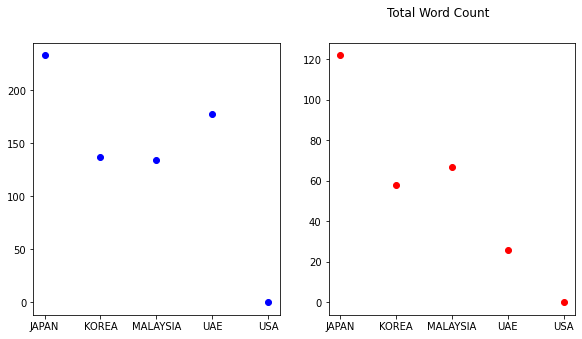

In [349]:
# Total GOOD or BAD Word count visualization 
countryNames = ['JAPAN', 'KOREA', 'MALAYSIA', 'UAE', 'USA']

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(countryNames, data['Good'],'ro' , color = 'b')
plt.subplot(132)
plt.plot(countryNames, data['Bad'], 'ro', color='r')
plt.suptitle('Total Word Count')
plt.show()

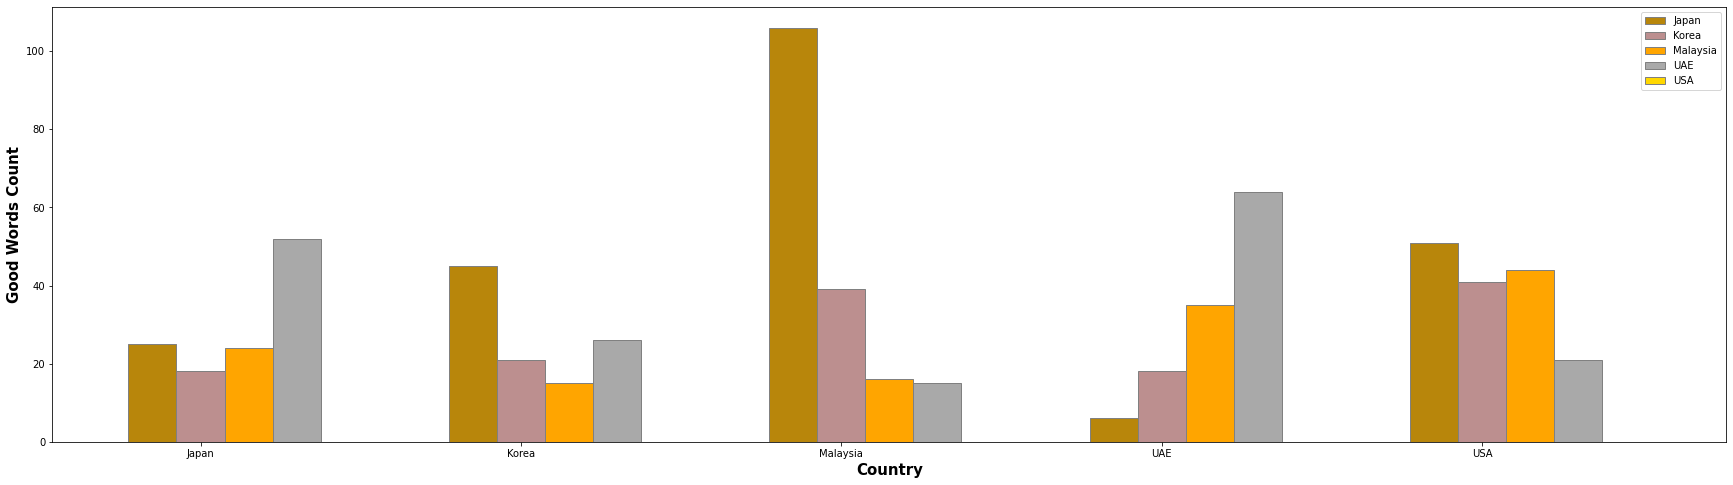

In [350]:
# GOOD or BAD Word Count per article visualization 
# # set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(30, 8))
 
# set height of bar
# articlesJapan = data['byArticleWordCountG'][0]
 
# Set position of bar on X axis
br1 = np.arange(number_of_articles)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, data['byArticleWordCountG'][0], color ='darkgoldenrod', width = barWidth,
        edgecolor ='grey', label ='Japan')
plt.bar(br2, data['byArticleWordCountG'][1], color ='rosybrown', width = barWidth,
        edgecolor ='grey', label ='Korea')
plt.bar(br3, data['byArticleWordCountG'][2], color ='orange', width = barWidth,
        edgecolor ='grey', label ='Malaysia')
plt.bar(br4, data['byArticleWordCountG'][3], color ='darkgrey', width = barWidth,
        edgecolor ='grey', label ='UAE')
plt.bar(br5, data['byArticleWordCountG'][4], color ='gold', width = barWidth,
        edgecolor ='grey', label ='USA')
 
# Adding Xticks
plt.xlabel('Country', fontweight ='bold', fontsize = 15)
plt.ylabel('Good Words Count', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['Japan', 'Korea', 'Malaysia', 'UAE', 'USA'])
 
plt.legend()
plt.show()

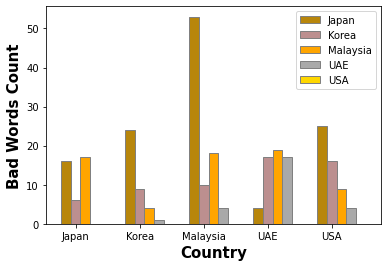

In [351]:
# Make the plot
plt.bar(br1, data['byArticleWordCountB'][0], color ='darkgoldenrod', width = barWidth,
        edgecolor ='grey', label ='Japan')
plt.bar(br2, data['byArticleWordCountB'][1], color ='rosybrown', width = barWidth,
        edgecolor ='grey', label ='Korea')
plt.bar(br3, data['byArticleWordCountB'][2], color ='orange', width = barWidth,
        edgecolor ='grey', label ='Malaysia')
plt.bar(br4, data['byArticleWordCountB'][3], color ='darkgrey', width = barWidth,
        edgecolor ='grey', label ='UAE')
plt.bar(br5, data['byArticleWordCountB'][4], color ='gold', width = barWidth,
        edgecolor ='grey', label ='USA')
 
# Adding Xticks
plt.xlabel('Country', fontweight ='bold', fontsize = 15)
plt.ylabel('Bad Words Count', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['Japan', 'Korea', 'Malaysia', 'UAE', 'USA'])
 
plt.legend()
plt.show()

### Conclusion

In [368]:
# 1. By determining the average word count ratio for each country
# word count / good word count (WCGW) ratios and its average (has 10 multiplier : byArticleWordCountGood/wordCount * 10 )
WCGW = [[data['byArticleWordCountG'][i][j]/wordCount[i][j] * 10 if data['byArticleWordCountG'][i][j] != 0 else 0 for j in range(number_of_articles)] for i in range(number_of_countries)]
WCBW = [[data['byArticleWordCountB'][i][j]/wordCount[i][j] * 10 if data['byArticleWordCountB'][i][j] != 0 else 0 for j in range(number_of_articles)] for i in range(number_of_countries)]
aveWCGW = [sum(WCGW[i])/number_of_articles for i in range(5)]
aveWCBW = [sum(WCBW[i])/number_of_articles for i in range(5)]

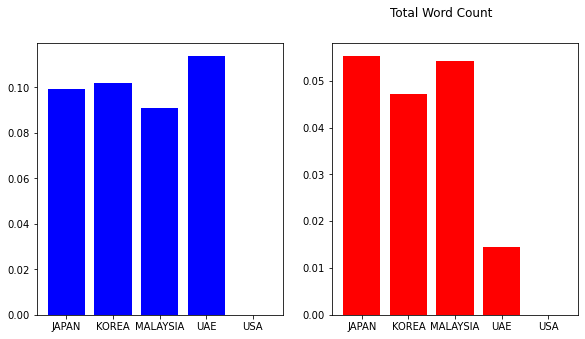

In [369]:
plt.figure(figsize=(15, 5))

plt.suptitle('Total Word Count')
plt.subplot(131)
plt.bar(countryNames, aveWCGW, color = 'b')
plt.subplot(132)
plt.bar(countryNames, aveWCBW, color='r')

plt.show()

In [370]:
WCGW[0][1]

0.0969409737182249

In [371]:
WCBW[0][1] 

0.05170185264971995

##### based on this graph,UAE might have a better market sentiment due to having the highest good word to word count ratio and the lowest bad word to word count ratio.

In [372]:
# 2. By determining the sentiment given by an article of a country
articleSentiments = [[True if WCGW[i][j] > WCBW[i][j] else False for j in range(number_of_articles)] for i in range(number_of_countries)]
articleSentiments

[[True, True, True, True, True],
 [True, True, True, True, True],
 [True, True, False, True, True],
 [True, True, True, True, True],
 [False, False, False, False, False]]

In [ ]:
# every article in each country giving a positive sentiment to the public
